In [43]:
import os
import  numpy as numpy
import tensorflow as tf 
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

Fetch images  count from Folders

In [8]:
count=0
dirs=os.listdir('images')
for dir in dirs:
    files=list(os.listdir('images/'+dir))
    count+=len(files)
    print('The Folder ' +dir +' has '+str(len(files))+' images')
print('total images count :'+ str(count))

The Folder daisy has 501 images
The Folder dandelion has 646 images
The Folder rose has 497 images
The Folder sunflower has 495 images
The Folder tulip has 607 images
total images count :2746


Load images into arrays as dataset

In [10]:
base_dir='images/'
img_size=180
batch=32

Batch Size:
 Batch size refers to the number of training examples (data samples) processed before the model's internal    parameters (weights) are updated. In other words, during each training iteration, the model looks at a batch of samples instead of the entire dataset. Loading and processing the entire dataset at once can be memory-intensive, especially with large datasets. Batching helps mitigate this by processing smaller subsets of the data at a time.

 Seed:

 The seed is a number used to initialize the random number generator. This is crucial for operations that involve randomness, such as shuffling the dataset or splitting it into training and validation sets.hen you split a dataset into training and validation sets, you typically shuffle the data first. If you do this without a seed, different runs will produce different splits, which can lead to different model performances.

In [22]:
train_ds=tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='training', batch_size=batch,image_size=(img_size,img_size))
val_ds=tf.keras.utils.image_dataset_from_directory(base_dir,seed=123,validation_split=0.2,subset='validation', batch_size=batch,image_size=(img_size,img_size))

Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 2746 files belonging to 5 classes.
Using 549 files for validation.


In [23]:
flower_names=train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [24]:
import matplotlib.pyplot as plt


This snippet visualizes the first 9 images from the training dataset, showing them in a structured grid and labeling each with the appropriate flower name.

Initialization:

train_ds.take(1): This retrieves the first batch of images and labels from the train_ds dataset. train_ds is a TensorFlow dataset created using tf.keras.utils.image_dataset_from_directory(). The take(1) function means that only one batch (which consists of a specified number of images, depending on the batch_size parameter) is retrieved for plotting.
images: Contains the batch of images.
labels: Contains the corresponding labels for the images (usually numeric indices representing the class of each image).

Looping Through the Images:
images[i]: This retrieves the i-th image from the batch.
.numpy(): Converts the TensorFlow tensor to a NumPy array, which is required for Matplotlib to display the image.
.astype('uint8'): Converts the pixel values to uint8 format, which is a standard format for images (values ranging from 0 to 255).
plt.imshow(...): This function displays the image in the current subplot.

Each image from the batch is accessed using images[i].
The image tensor is converted to a NumPy array with .numpy() and cast to uint8 format to ensure it is in the correct format for displaying (pixel values from 0 to 255).
The image is displayed in the current subplot using plt.imshow(...).
Setting the Title:

plt.title(...): This function sets the title for the current subplot.
flower_names[labels[i]]: This uses the numeric label from labels[i] to index into the flower_names list (or array), which contains the actual names of the flowers corresponding to the labels. This provides a descriptive title for each image displayed.

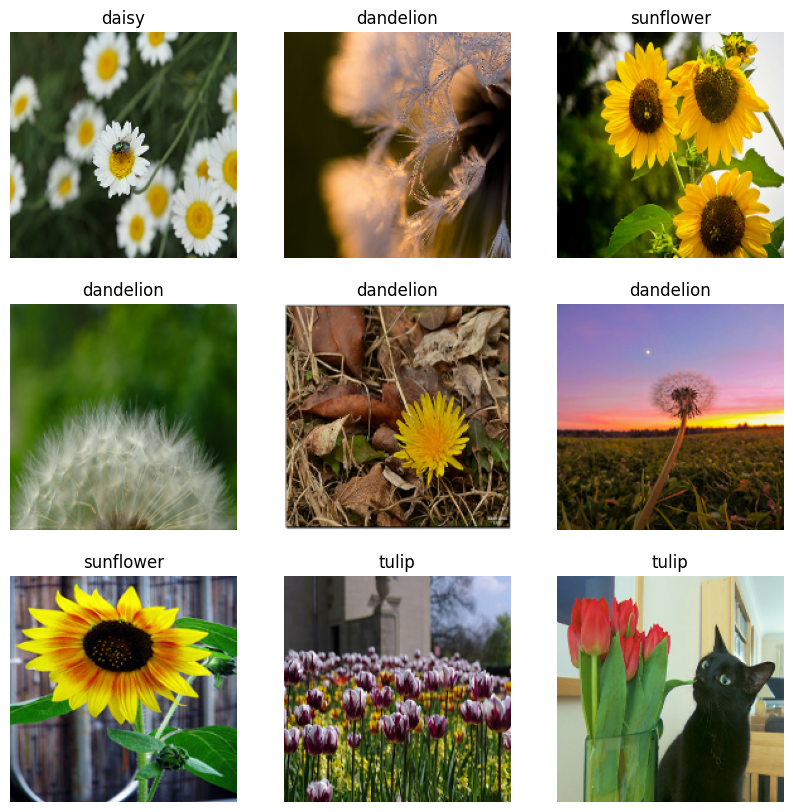

In [25]:
i=0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

This code snippet optimizes the training and validation datasets by caching them in memory, shuffling the training data for better randomness, and prefetching batches to improve the overall efficiency of the training process. This setup helps ensure that the model can train without being delayed by data loading times.

In [26]:
AUTOTUNE=tf.data.AUTOTUNE

In [27]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [28]:
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Data Augmentation

Data augmentation generates new images from existing ones by applying various transformations, such as rotation, translation, and scaling. For instance, by rotating an image at different angles, the model can learn to recognize the same object from various perspectives. This process not only increases the diversity of the training dataset but also enhances the model's ability to generalize, improving its performance on unseen data. Ultimately, data augmentation helps the model become more robust and accurate by providing a richer set of training examples derived from a single source image.

In [32]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

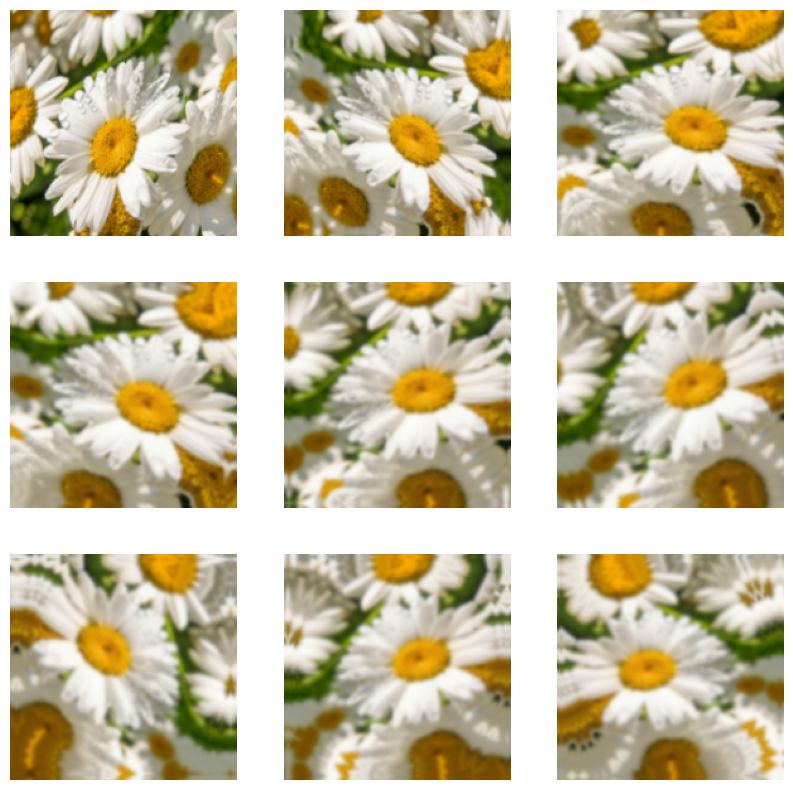

In [36]:
i=0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images=data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

Model Creation

Model Architecture Breakdown
Sequential Model:

model = Sequential([...])
What happens: Initializes a sequential model that will stack layers in a linear order.

Data Augmentation:

data_augmentation: (e.g., flipping, rotating, etc.)
What happens: Applies transformations to the input images to create variations, helping improve model generalization.

Rescaling:

layers.Rescaling(1./255)
What happens: Normalizes pixel values from [0, 255] to [0, 1].

First Convolutional Layer:

Conv2D(16, 3, padding='same', activation='relu')
What happens: Applies 16 filters of size 3x3, using ReLU activation. The output has the same height and width as the input due to 'same' padding.

First Max Pooling Layer:

MaxPooling2D()
What happens: Reduces spatial dimensions by taking the maximum value in a 2x2 window, effectively down-sampling.

Second Convolutional Layer:

Conv2D(32, 3, padding='same', activation='relu')
What happens: Applies 32 filters of size 3x3 to learn more complex features.

Second Max Pooling Layer:

MaxPooling2D()
What happens: Further reduces the spatial dimensions, retaining important features.

Third Convolutional Layer:

Conv2D(64, 3, padding='same', activation='relu')
What happens: Applies 64 filters, extracting even more complex features.

Third Max Pooling Layer:

MaxPooling2D()
What happens: Further down-samples the feature maps, reducing dimensions while keeping essential information.

Dropout Layer:

Dropout(0.2)
What happens: Randomly sets 20% of the neurons to zero during training, which helps prevent overfitting.

Flatten Layer:

Flatten()
What happens: Converts the 2D feature maps into a 1D array, preparing the data for fully connected layers.

First Dense Layer:

Dense(128, activation='relu')
What happens: Fully connected layer with 128 neurons, where each neuron receives input from all previous neurons. It learns to combine features.

Output Dense Layer:

Dense(5)
What happens: Output layer with 5 neurons, corresponding to the number of classes (e.g., flower types). Typically, this layer does not have an activation function specified for regression or logits.

there are 11 layers in total, as detailed below:

Data Augmentation Layer: This is a sequential layer that applies various augmentations.
Rescaling Layer: This layer rescales pixel values from the range [0, 255] to [0, 1].
Conv2D Layer 1: Convolutional layer with 16 filters.
MaxPooling2D Layer 1: Pooling layer to reduce spatial dimensions.
Conv2D Layer 2: Convolutional layer with 32 filters.
MaxPooling2D Layer 2: Pooling layer to reduce spatial dimensions.
Conv2D Layer 3: Convolutional layer with 64 filters.
MaxPooling2D Layer 3: Pooling layer to reduce spatial dimensions.
Dropout Layer: Regularization layer to prevent overfitting.
Flatten Layer: Flattens the output to feed into the dense layers.
Dense Layer 1: Fully connected layer with 128 neurons.
Dense Layer 2 (Output Layer): Fully connected layer with 5 neurons (for 5 classes).

In [38]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

 train the neural network model on the training data

 epochs=15:

This specifies the number of times the model will iterate over the entire training dataset. In this case, the model will go through the training dataset 15 times.
Why Epochs?: The number of epochs influences the training process. More epochs give the model additional opportunities to learn from the data, though too many epochs can lead to overfitting.
validation_data=val_ds:

validation_data

This is the validation dataset used to evaluate the model’s performance after each epoch without updating the weights.
Purpose: It helps you monitor the model's generalization ability, providing an early indication of overfitting if the validation performance diverges from the training performance.
What Does model.fit() Return?
The fit() function returns a History object, stored here as history. This object contains data on training and validation losses and metrics across all epochs, which is useful for plotting and analyzing the model’s performance over time.

In [40]:
history=model.fit(train_ds,epochs=15,validation_data=val_ds)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 780ms/step - accuracy: 0.2888 - loss: 1.5445 - val_accuracy: 0.4973 - val_loss: 1.2531
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 46s 664ms/step - accuracy: 0.5299 - loss: 1.1265 - val_accuracy: 0.5792 - val_loss: 1.1135
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 49s 708ms/step - accuracy: 0.6143 - loss: 1.0218 - val_accuracy: 0.5774 - val_loss: 1.0739
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6476 - loss: 0.9174 - val_accuracy: 0.6138 - val_loss: 1.0250
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 62s 884ms/step - accuracy: 0.6542 - loss: 0.9012 - val_accuracy: 0.6503 - val_loss: 0.9953
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 56s 806ms/step - accuracy: 0.6904 - loss: 0.8144 - val_accuracy: 0.6776 - val_loss: 0.8870
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 48s 702ms/step - accuracy: 0.6967 - loss: 0.7746 - val_accuracy: 0.6557 - val_loss: 0.8628
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 67s 974ms/step - accuracy: 0.7364 - loss: 0.6996 - val_accurac

In [44]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [45]:
classify_images('Sample/dandelion.jfif')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


'The Image belongs to dandelion with a score of 92.6196813583374'

In [46]:
model.save('Flower_recog_model.h5')